

Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt



In [5]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [7]:
# code here
new_movie_df = movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 
                               'homepage', 'overview', 'production_companies', 'original_title', 
                               'title'], axis=1) 
new_movie_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


#### Remove any duplicate rows

In [8]:
# code here

#we can use the groupby function 
#remove_duplicates = new_movie_df.groupby(['genres', 'production_countries', 'spoken_languages']).id.transform(max)
#new_movie_df = new_movie_df.loc[new_movie_df.id == remove_duplicates]

#But we will use the sort method and also we will be viewing the head() of the dataframe only
new_movie_df.sort_values('id').drop_duplicates(subset=['genres', 
                                                       
                                                       'production_countries', 'spoken_languages'], keep='last').head()


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
3766,4000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",5,22.876230,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,4300000,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.5,530
2799,12800000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",16,22.022228,"[{""iso_3166_1"": ""AR"", ""name"": ""Argentina""}, {""...",2000-05-17,40031879,140.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,377
322,90000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",18,109.528572,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",1997-05-07,263920180,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.3,3885
2638,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",19,32.351527,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",8.0,657
4023,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",20,7.958831,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2003-03-07,9726954,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.2,77


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [9]:
# Code here
# Create a temporary dataset
temp_df = new_movie_df

# remove all the rows that contain a missing value.
temp_df.dropna().head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [10]:
# Change the release_date column to DateTime column
temp_df.rename(columns={'release_date': 'date_time'}, inplace=True)
# Extract the release year from every release date
temp_df['year'] = pd.DatetimeIndex(temp_df['date_time']).year
#note a new colunm called 'year' has been created
temp_df.head()



,budget,genres,id,popularity,production_countries,date_time,revenue,runtime,spoken_languages,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012.0


In [16]:
# Changing the release_date column to DateTime column
movies_df.release_date = pd.to_datetime(movies_df['release_date'])
# To answer the last question, we'll have to extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [11]:
temp_df.budget.dtypes
temp_df.revenue.dtypes

dtype('int64')

In [12]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [22]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [14]:
# Code here
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
17,380000000,"['Adventure', 'Action', 'Fantasy']",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-05-14,1045713802,136.0,"['English', 'Español']",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,['English'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Released,NaN,Superman Returns,5.4,1400
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
# Since we need to compare the minimums and maximums in 3 questions, 
# we can write a generic function to do that for us and reuse that

def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,265
budget,380000000,0
genres,"['Adventure', 'Action', 'Fantasy']","['Comedy', 'Fantasy', 'Family']"
homepage,http://disney.go.com/pirates/index-on-stranger...,NaN
id,1865,10588
keywords,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...","[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam..."
original_language,en,en
original_title,Pirates of the Caribbean: On Stranger Tides,The Cat in the Hat
overview,Captain Jack Sparrow crosses paths with a woma...,Conrad and Sally Walden are home alone with th...
popularity,135.413856,18.251129
production_companies,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Imagine Entertainment"", ""id"": 23}, ..."


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [15]:
# code here
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
        'release_year',
         'runtime',
         'spoken_languages',
         'title',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()



KeyError: "['release_year'] not in index"

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [16]:
# Code here
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
popular_movies_df.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
17,380000000,"['Adventure', 'Action', 'Fantasy']",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2011-05-14,1045713802,136.0,"['English', 'Español']",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,665713802
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,2015-04-22,1405403694,141.0,['English'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,1125403694
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Released,NaN,Superman Returns,5.4,1400,121081192
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100


In [17]:
# in terms of runtime
# Average runtime of movies
movies_df['runtime'].mean()
# comparison
find_min_max_in('runtime')

NameError: name 'find_min_max_in' is not defined

In [18]:
# movies rated above 7 

movies_df[movies_df['vote_average'] >= 7.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099
6,260000000,"['Animation', 'Family']",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2010-11-24,591794936,100.0,['English'],Released,They're taking adventure to new lengths.,Tangled,7.4,3330,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,2015-04-22,1405403694,141.0,['English'],Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",http://harrypotter.warnerbros.com/harrypottera...,767,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,2009-07-07,933959197,153.0,['English'],Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4766,0,"['Documentary', 'Music']",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963,"[{""id"": 1228, ""name"": ""1970s""}, {""id"": 6027, ""...",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,3.277287,"[{""name"": ""FM Productions"", ""id"": 12601}, {""na...",...,1978-05-01,321952,117.0,['English'],Released,It Started as a Concert. It Became a Celebration.,The Last Waltz,7.9,64,321952
4773,27000,['Comedy'],http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,1994-09-13,3151130,92.0,['English'],Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,3124130
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,"[{""name"": ""Daiei Studios"", ""id"": 881}]",...,1997-11-06,99000,111.0,['日本語'],Released,Madness. Terror. Murder.,Cure,7.4,63,79000
4797,0,"['Foreign', 'Thriller']",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],...,2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2,0


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [21]:
# Code here
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()



KeyError: 'release_year'

In [34]:
# Most profitable year from the given dataset.

profits_year.idxmax()

2012.0

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [19]:
# Code here
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

<AxesSubplot:>

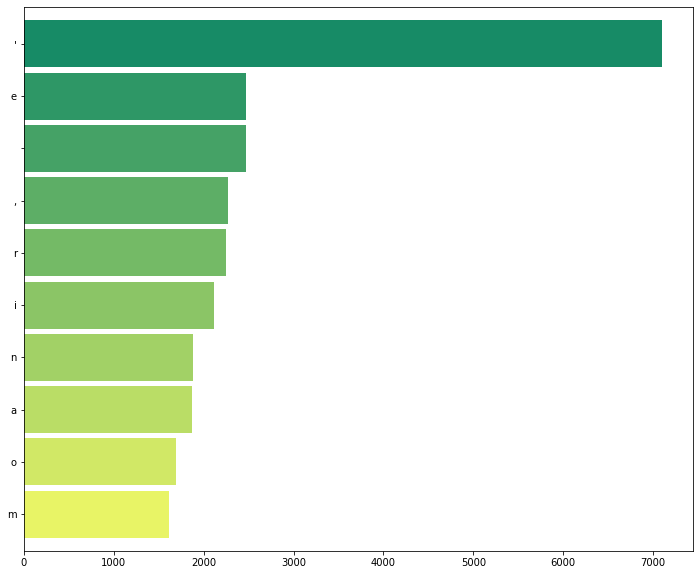

In [20]:
#### Generate three different interesting visualisations with a data story.
plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in profit_data['genres']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)
# output looks like
# Crime             170
# Fantasy           193
# ScienceFiction    195
# Romance           196
# Family            213
# Thriller          362

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

ax

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

# See the automobile.ipynb for the ABOVE